# Introduction

Sleep seems like a waste of time. But I did take the course about Learning how to learn at Coursera, and they say that sleep makes our brain cleaner and healthier. It is like washing the toxins in our brains. They also said getting less sleep over a long time could cause headaches, heart disease, diabetes, and dying young. So now, how can we get a good sleep quality? So, in this research, I will find out those ideas. Using the dataset from Kaggle, I will find the pattern correlation and test the hypotheses using a statistical method. Keep in mind that the dataset is not representative of the world. But it's good to consider the results later on.

# Import and Reading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
sleep = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")

In [3]:
sleep.head(3)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN


In [4]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


# Exploratory Data Analysis (EDA)

## Data Manipulation

In [5]:
# sleep disorder column unique value
print("Sleep disorder column contains:", sleep["Sleep Disorder"].unique())

Sleep disorder column contains: [nan 'Sleep Apnea' 'Insomnia']


In [6]:
# fill the missing value of sleep disorder column with "None"
sleep["Sleep Disorder"].fillna("None", inplace=True)

print("Sleep disorder column now contains:", sleep["Sleep Disorder"].unique())

Sleep disorder column now contains: ['None' 'Sleep Apnea' 'Insomnia']


__Why do I fill in the missing values?__

From the dataset, I find missing values from the sleep disorder column. I will fill the missing value with "None, " meaning that a person who corresponds to a sleep disorder missing value will have no sleep disorder illness. This will be good for seeing the pattern of the data later.

In [7]:
sleep["Occupation"].value_counts()

Occupation
Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: count, dtype: int64

In [8]:
# merge the values
sleep["Occupation"] = sleep["Occupation"].replace({
    "Sales Representative": "Salesperson",
    "Software Engineer": "Other",
    "Scientist": "Other",
    "Manager": "Other"
})

In [9]:
sleep["Occupation"].value_counts()

Occupation
Nurse          73
Doctor         71
Engineer       63
Lawyer         47
Teacher        40
Accountant     37
Salesperson    34
Other           9
Name: count, dtype: int64

__Merging the categories of the occupation column__

I merge the occupation column categories because this will be useful later on to test the hypothesis independencies to another column using chi-square. After all, the chi-square needs at least five values for each category.

__Note__ : if the requirements are fulfilled

In [10]:
print("BMI category contains:", sleep["BMI Category"].unique())

BMI category contains: ['Overweight' 'Normal' 'Obese' 'Normal Weight']


In [11]:
sleep["BMI Category"].value_counts()

BMI Category
Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: count, dtype: int64

In [12]:
sleep["BMI Category"] = sleep["BMI Category"].replace({
    "Obese": "Overweight",
    "Normal Weight": "Normal"
})

In [13]:
print("BMI category now contains:", sleep["BMI Category"].unique())

BMI category now contains: ['Overweight' 'Normal']


In [14]:
sleep["BMI Category"].value_counts()

BMI Category
Normal        216
Overweight    158
Name: count, dtype: int64

__Merging the categories of the BMI category column__

I merge the BMI category column to simplify the category. This can also be useful to test the statistical hypothesis of that column to another column using ANOVA and the Chi-Square Independencies test. The ANOVA needs at least 30 values for each category, and the Chi-Square test requires at least five values for each category.

__Note__ : if the requirements are fulfilled

In [15]:
# generate new features
sleep[['Systolic', 'Diastolic']] = sleep['Blood Pressure'].str.split('/', expand=True)

# convert to numeric
sleep['Systolic'] = pd.to_numeric(sleep['Systolic'])
sleep['Diastolic'] = pd.to_numeric(sleep['Diastolic'])

In [16]:
sleep.head(3)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Other,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80


In [17]:
# generate new features
labels = ["Normal", "Elevated", "Hypertension"]
sys_bins = [0, 120, 140, np.inf]
dia_bins = [0, 80, 90, np.inf]

sleep['Systolic Category'] = pd.cut(sleep["Systolic"], labels=labels, bins=sys_bins)
sleep['Diastolic Category'] = pd.cut(sleep["Diastolic"], labels=labels, bins=dia_bins)

In [18]:
sleep.head(3)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,Systolic Category,Diastolic Category
0,1,Male,27,Other,6.1,6,42,6,Overweight,126/83,77,4200,None,126,83,Elevated,Elevated
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,Elevated,Normal
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,125,80,Elevated,Normal


__Why do I generate new features?__

According to the Centers for Disease Control and Prevention (CDC), the national public health agency of the United States, blood pressure is divided into three categories: normal, elevated, and hypertension. The split into three categories aims to see the blood pressure for each person and the correlation between sleep quality and other columns.

## Statistical Information

In [19]:
sleep.drop(columns="Person ID").describe().round(2)

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Systolic,Diastolic
count,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00,374.00
mean,42.18,7.13,7.31,59.17,5.39,70.17,6816.84,128.55,84.65
std,8.67,0.80,1.20,20.83,1.77,4.14,1617.92,7.75,6.16
min,27.00,5.80,4.00,30.00,3.00,65.00,3000.00,115.00,75.00
25%,35.25,6.40,6.00,45.00,4.00,68.00,5600.00,125.00,80.00
50%,43.00,7.20,7.00,60.00,5.00,70.00,7000.00,130.00,85.00
75%,50.00,7.80,8.00,75.00,7.00,72.00,8000.00,135.00,90.00
max,59.00,8.50,9.00,90.00,8.00,86.00,10000.00,142.00,95.00


## Correlation and Visualization

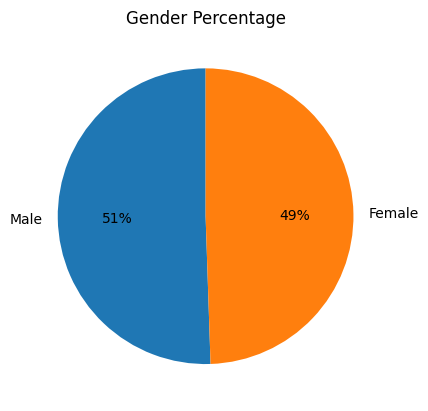

In [20]:
gender_counts = sleep["Gender"].value_counts()

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.0f%%', startangle=90)
plt.title("Gender Percentage")
plt.show()

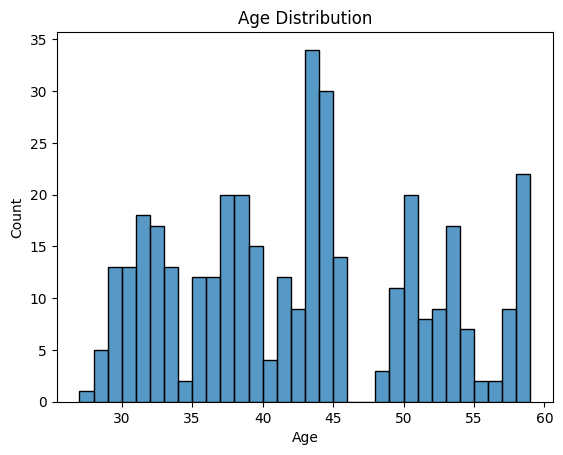

In [21]:
sns.histplot(sleep, x="Age", binwidth=1)
plt.title("Age Distribution")
plt.show()

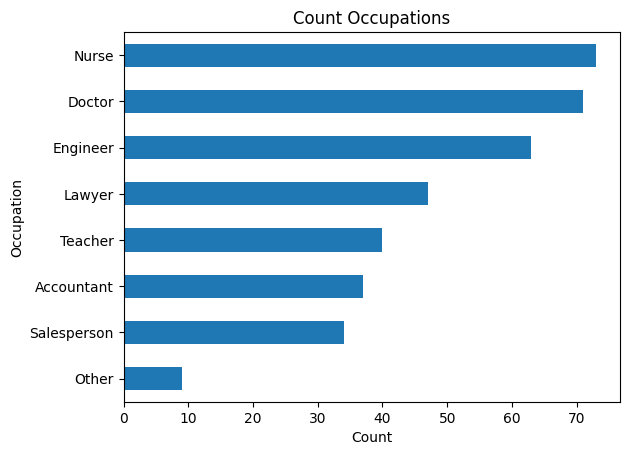

In [22]:
sleep["Occupation"].value_counts(ascending=True).plot(kind="barh", title="Count Occupations")
plt.xlabel("Count")
plt.show()

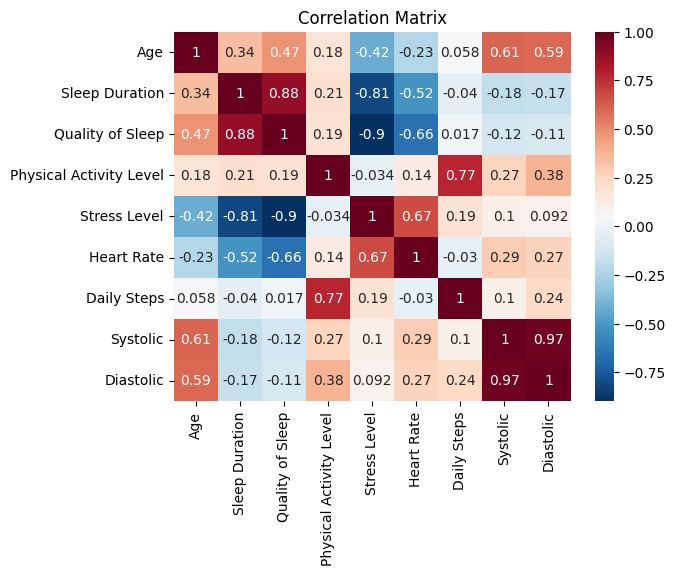

In [23]:
sleep_corr = sleep.select_dtypes("number").drop(columns="Person ID").corr()

sns.heatmap(sleep_corr, cmap="RdBu_r", annot=True)
plt.title("Correlation Matrix")
plt.show()

__What do we get?__

Look at the correlation matrix. Quality of sleep has a strong relationship with sleep duration and stress level. The sleep quality is better with a higher sleep duration, and vice versa. If you lower your stress level, your sleep quality will be better. But that relationship does need to be explained by cause and effect. It just explains to what extent linearity. And sleep quality is also strong enough to age and heart rate.

__What's next?__ 

I will find out more about the gender, BMI category, sleep disorder, occupations, and blood pressure category.

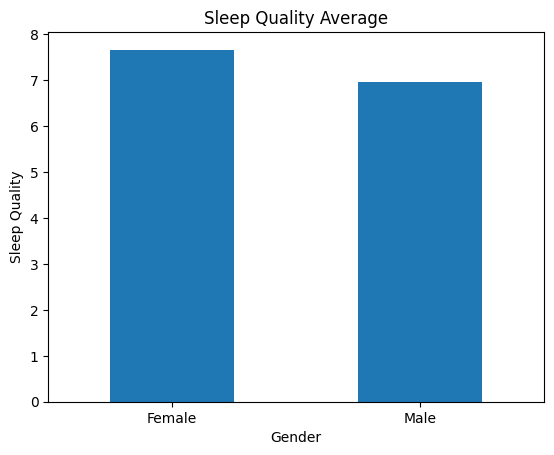

In [24]:
sleep.groupby("Gender")["Quality of Sleep"].mean().plot(kind="bar", rot=0)
plt.ylabel("Sleep Quality")
plt.title("Sleep Quality Average")
plt.show()

__Is it valid in statistics? (Using t-test)__

$H_0$ : The mean quality of sleep is __the same__ for females and males.

$H_A$ : The mean quality of sleep is __greater__ for females compared to males.

In [25]:
gender_count = sleep["Gender"].value_counts()

if (gender_count >= 30).all() == True:
    print("Okay, we can test the quality of sleep by gender using the t-test")
else:
    print("Sorry, you can't do a t-test")

Okay, we can test the quality of sleep by gender using the t-test


In [26]:
# 5% significance
alpha = 0.05

xbar = sleep.groupby("Gender")["Quality of Sleep"].mean()
s = sleep.groupby("Gender")["Quality of Sleep"].std()
n = sleep.groupby("Gender")["Quality of Sleep"].count()

print(xbar)
print(s)
print(n)

Gender
Female    7.664865
Male      6.968254
Name: Quality of Sleep, dtype: float64
Gender
Female    1.279482
Male      0.999493
Name: Quality of Sleep, dtype: float64
Gender
Female    185
Male      189
Name: Quality of Sleep, dtype: int64


In [27]:
# t score

numerator = xbar["Female"] - xbar["Male"]
denominator = np.sqrt(s["Female"] ** 2 / n["Female"] + s["Male"] ** 2 / n["Male"])

t_score = numerator / denominator
degree_of_freedom = n["Female"] + n["Male"] - 2

t_score, degree_of_freedom

(5.859317976055214, 372)

In [28]:
# p value

from scipy.stats import t

# right tail
p_value = 1 - t.cdf(t_score, df=degree_of_freedom)
print(p_value)
print("Is p_value <= signficance:", p_value <= alpha)

5.12094588955847e-09
Is p_value <= signficance: True


__What's the meaning?__

Because p_value <= 0.05, then reject $H_0$. It means statistically, the mean quality of sleep is __greater__ for females compared to males.

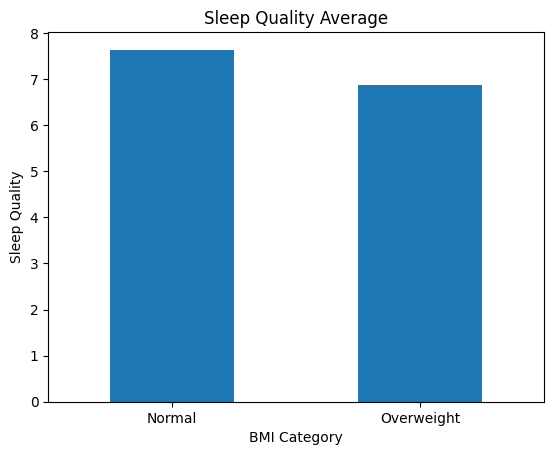

In [29]:
sleep.groupby("BMI Category")["Quality of Sleep"].mean().plot(kind="bar", rot=0)
plt.ylabel("Sleep Quality")
plt.title("Sleep Quality Average")
plt.show()

__Is it valid in statistics? (Using t-test)__

$H_0$ : The mean quality of sleep is __the same__ for normal weight and overweight.

$H_A$ : The mean quality of sleep is __greater__ for normal weight compared to overweight.

In [30]:
bmi_count = sleep["BMI Category"].value_counts()

if (bmi_count >= 30).all() == True:
    print("Okay, we can test the quality of sleep by BMI category using the t-test")
else:
    print("Sorry, you can't do a t-test")

Okay, we can test the quality of sleep by BMI category using the t-test


In [31]:
# 5% significance
alpha = 0.05

xbar = sleep.groupby("BMI Category")["Quality of Sleep"].mean()
s = sleep.groupby("BMI Category")["Quality of Sleep"].std()
n = sleep.groupby("BMI Category")["Quality of Sleep"].count()

print(xbar)
print(s)
print(n)

BMI Category
Normal        7.638889
Overweight    6.867089
Name: Quality of Sleep, dtype: float64
BMI Category
Normal        0.997283
Overweight    1.302151
Name: Quality of Sleep, dtype: float64
BMI Category
Normal        216
Overweight    158
Name: Quality of Sleep, dtype: int64


In [32]:
# t score

numerator = xbar["Normal"] - xbar["Overweight"]
denominator = np.sqrt(s["Normal"] ** 2 / n["Normal"] + s["Overweight"] ** 2 / n["Overweight"])

t_score = numerator / denominator
degree_of_freedom = n["Normal"] + n["Overweight"] - 2

t_score, degree_of_freedom

(6.232279289985464, 372)

In [33]:
# p value

from scipy.stats import t

# right tail
p_value = 1 - t.cdf(t_score, df=degree_of_freedom)
print(p_value)
print("Is p_value <= signficance:", p_value <= alpha)

6.232349081258803e-10
Is p_value <= signficance: True


__What's the meaning?__

Because p_value <= 0.05, then reject $H_0$. It means statistically, the mean quality of sleep is __greater__ for normal weight compared to overweight.

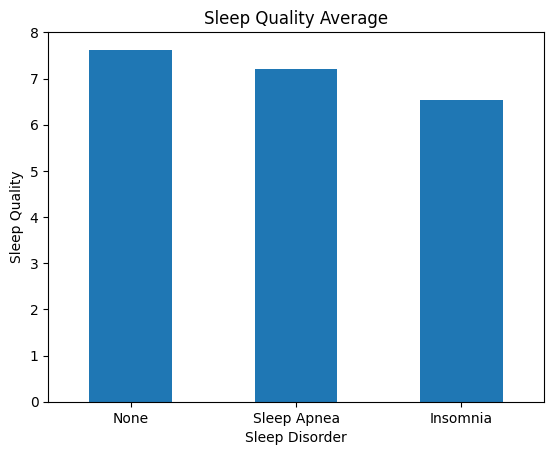

In [34]:
sleep.groupby("Sleep Disorder")["Quality of Sleep"].mean().sort_values(ascending=False) \
    .plot(kind="bar", rot=0)
plt.ylabel("Sleep Quality")
plt.title("Sleep Quality Average")
plt.show()

__What do we get here?__

People who don't have sleep disorders tend to have better sleep quality than people who have sleep disorders, but I can't test the hypotheses of mean sleep quality by sleep disorder statistically using a t-test because three categories are in the sleep disorder column. Instead, I will try the dependencies between sleep disorder and the BMI category.

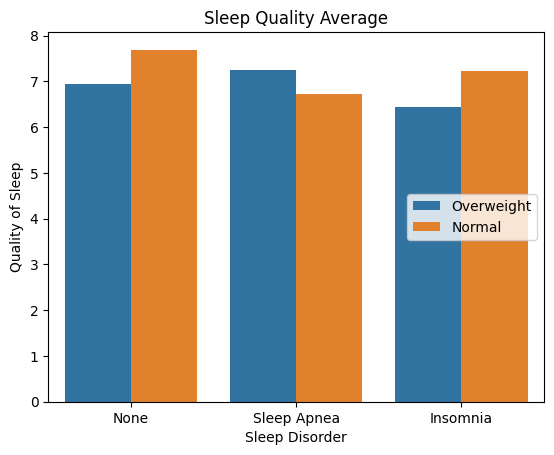

In [35]:
sns.barplot(sleep, x="Sleep Disorder", y="Quality of Sleep", hue="BMI Category", ci=None)
plt.title("Sleep Quality Average")
plt.legend(loc="right")
plt.show()

__Is BMI category and sleep disorder dependent on each other? (Using chi-square)__

$H_0$ : BMI category are __independent__ of sleep disorder

$H_A$ : BMI category are __not independent__ of sleep disorder

In [36]:
bmi_dis = sleep.groupby("BMI Category")["Sleep Disorder"].value_counts()

if (bmi_dis >= 5).all() == True:
    print("Okay, we can test the dependencies using chi-square test")
else:
    print("Sorry, you can't do chi-square test")

Okay, we can test the dependencies using chi-square test


In [37]:
# 5% significance
alpha = 0.05

In [38]:
import pingouin

expected, observed, stats = pingouin.chi2_independence(data=sleep, x="BMI Category", y="Sleep Disorder")

stat_pearson = stats[stats["test"] == "pearson"]

stat_pearson

,test,lambda,chi2,dof,pval,cramer,power
0,pearson,1.0,244.192363,2.0,9.425451e-54,0.808035,1.0


In [39]:
if stat_pearson["pval"][0] < alpha:
    print("Reject H_0")
else:
    print("Fail to reject H_0")

Reject H_0


__Chi-square we get__

From the chi-square test about dependencies of BMI category and sleep disorder, we have to reject $H_0$. It means that, statistically, the BMI category is not independent of sleep disorder. In other words, BMI category and sleep disorder interplay. For example, people who have no sleep disorder are influenced by normal weight or vice versa.

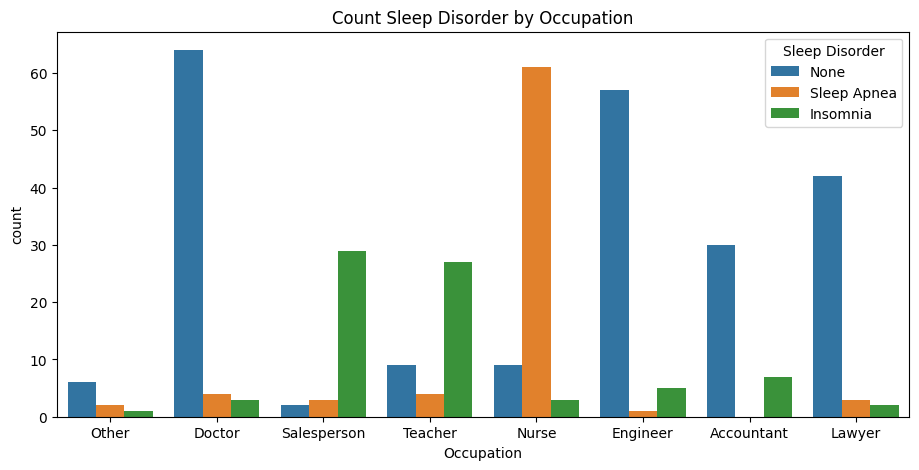

In [40]:
plt.figure(figsize=(11,5))
sns.countplot(sleep, x="Occupation", hue="Sleep Disorder")
plt.title("Count Sleep Disorder by Occupation")
plt.show()

In [41]:
occ_dis = sleep.groupby("Occupation")["Sleep Disorder"].value_counts()

if (occ_dis >= 5).all() == True:
    print("Okay, we can test the dependencies using chi-square test")
else:
    print("Sorry, you can't do chi-square test")

Sorry, you can't do chi-square test


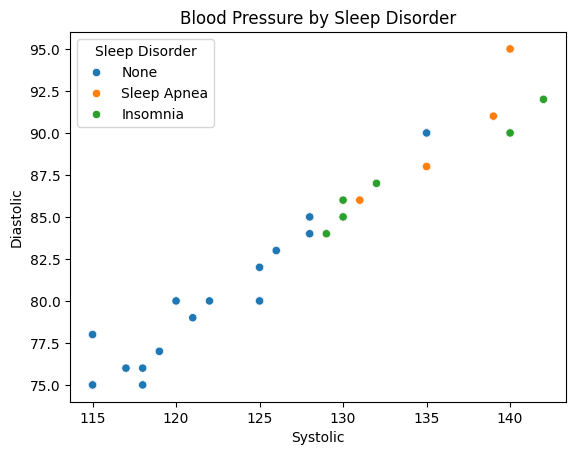

In [42]:
sns.scatterplot(sleep, x="Systolic", y="Diastolic", hue="Sleep Disorder")
plt.title("Blood Pressure by Sleep Disorder")
plt.show()

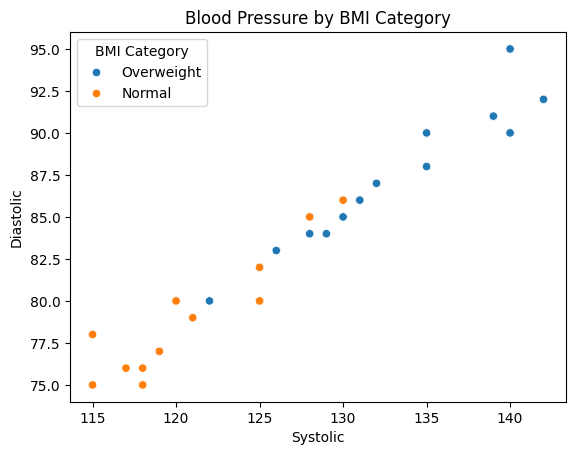

In [43]:
sns.scatterplot(sleep, x="Systolic", y="Diastolic", hue="BMI Category")
plt.title("Blood Pressure by BMI Category")
plt.show()

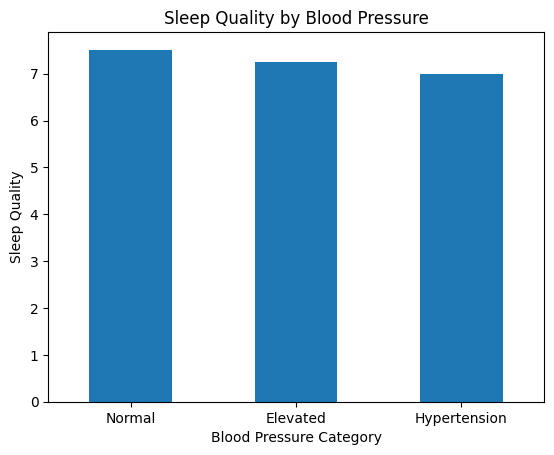

In [50]:
sleep.groupby("Systolic Category")["Quality of Sleep"].mean().plot(kind="bar", rot=0)
plt.title("Sleep Quality by Blood Pressure")
plt.xlabel("Blood Pressure Category")
plt.ylabel("Sleep Quality")
plt.show()

In [54]:
blood_sleep = sleep.groupby("Systolic Category")["Sleep Disorder"].value_counts()

if (blood_sleep >= 5).all() == True:
    print("Okay, you can test the dependencies using chis-quare")
else:
    print("Sorry, you can't test the dependencies. The requirements have to be met")

Sorry, you can't test the dependencies. The requirements have to be met


__What have we got?__

People with normal blood pressure tend to have more excellent sleep quality than those with high blood pressure. Unfortunately, I can't test the dependencies between the blood pressure category and sleep disorder because the requirements have not been met.

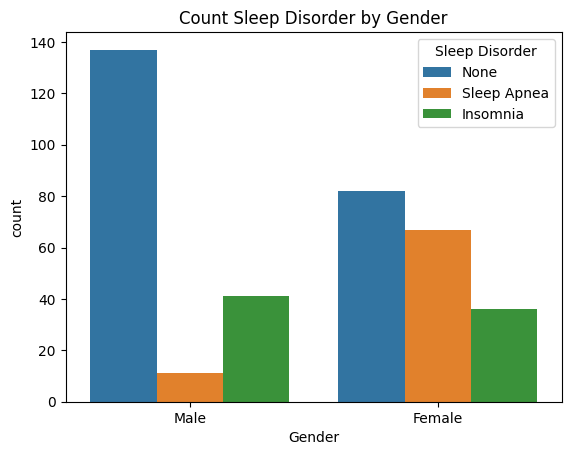

In [44]:
sns.countplot(sleep, x="Gender", hue="Sleep Disorder")
plt.title("Count Sleep Disorder by Gender")
plt.show()

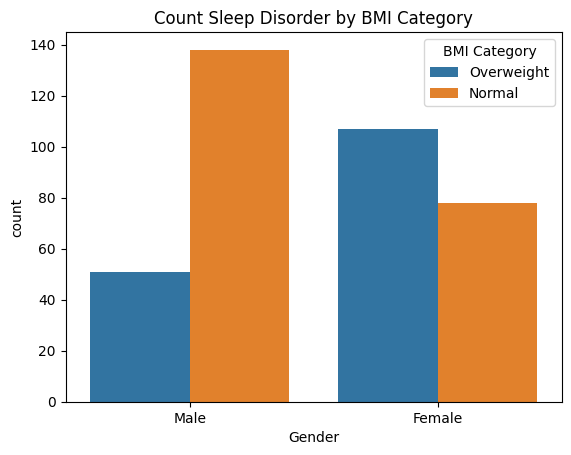

In [45]:
sns.countplot(sleep, x="Gender", hue="BMI Category")
plt.title("Count Sleep Disorder by BMI Category")
plt.show()

# Conclusions

The analysis shows the dataset has almost the same gender percentage between males and females. Then, the age distribution spread between 27 and 59 years old. After that, the occupation involved nurses, doctors, engineers, lawyers, teachers, accountants, and salespersons. Further correlation matrix analysis shows that sleep quality strongly correlates to sleep duration, stress level, and heart rate.

Sleep quality has a positive relationship with sleep duration. It means that the longer a person sleeps, the better the sleep quality. Meanwhile, sleep quality negatively correlates with stress level and heart rate. It means that the lower a person's stress level, the better their sleep quality. Their heart rate also follows this. The lower a person's heart rate, the better their sleep quality. However, it's worth noting that the correlation does not show a cause and effect. This shows the linearity of two things. After that, we got some hypotheses from the visualization involving gender, BMI category, and sleep disorder. We did statistical tests from those hypotheses, including mean and dependencies tests.

Statistically, the mean sleep quality for females is greater compared to males. Also, the mean sleep quality for normal weight is greater than for overweight people. Then, the BMI category, which is the weight of people and sleep disorders, interplay. For example, a person with no sleep disorder can be influenced by overweight or normal weight, and so on. Afterward, from the visualization, we can see that people with no sleep disorder have better sleep quality than those with sleep disorders such as sleep apnea or insomnia. From this correlation coefficient, visualization, and statistical tests, we can do some strategies to get better sleep quality, which is above the average value of 7.31 out of 10.

We can make strategies to avoid sleep disorders by controlling our weight. We can exercise, diet, or get an ideal weight. After that, we could manage our time to manage our tasks, which can affect getting a good sleep duration, and we must control our stress level. Also, the males have to be more aware of their sleep quality. If we follow all these suggestions, we may get great sleep, have a better life, and change the world.

# Limitation

My project is only limited to visualization and statistical tests. The reader could expand my project by doing machine learning analysis to analyze sleep quality.